# Linear Regression in statsmodels (practice)
## Task: Run a linear regression with statsmodels predict the price of a car.
Note: you will be revisiting this task for a later assignment, so you will want to create a new GitHub repository for your work.

- Dataset Link:  https://www.kaggle.com/datasets/hellbuoy/car-price-prediction 
    - Download and save in repo,
    
## Steps to Perform:
- Perform initial preprocessing of data
- Perform preprocessing for statsmodels
- Run the model in statsmodels and produce a results summary
- Evaluate the model on the test set


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
## fixing random for lesson generation
np.random.seed(321)
from sklearn.linear_model import LinearRegression
# Standard Statsmodels import
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv(r"Data/Data16/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
# Checking for null values
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

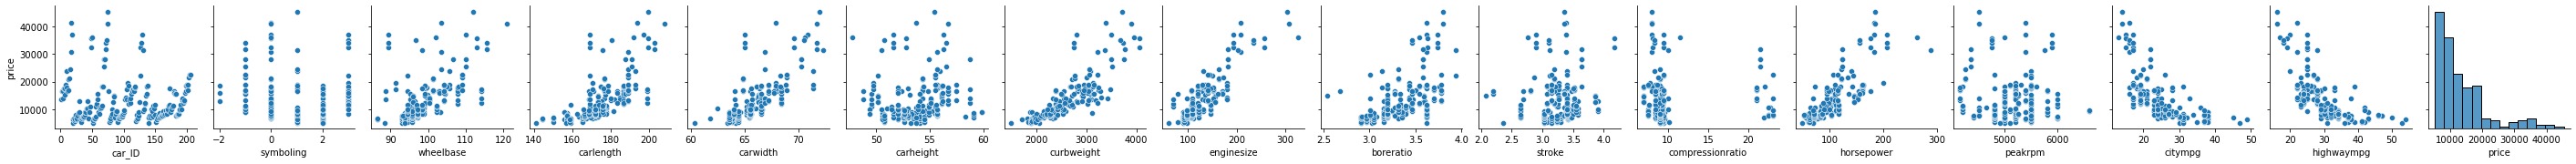

In [6]:
# Quick EDA for cols related to target
sns.pairplot(df, y_vars='price');

In [7]:
# Make x and y variables
y = df['price'].copy()
X = df.drop(columns=['car_ID', 'CarName', 'price']).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=321)
X_train.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
17,0,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,...,six,209,mpfi,3.62,3.39,8.0,182,5400,15,20
39,0,gas,std,four,sedan,fwd,front,96.5,175.4,65.2,...,four,110,1bbl,3.15,3.58,9.0,86,5800,27,33
40,0,gas,std,four,sedan,fwd,front,96.5,175.4,62.5,...,four,110,1bbl,3.15,3.58,9.0,86,5800,27,33
47,0,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,...,six,258,mpfi,3.63,4.17,8.1,176,4750,15,19
123,-1,gas,std,four,wagon,fwd,front,103.3,174.6,64.6,...,four,122,2bbl,3.35,3.46,8.5,88,5000,24,30


In [8]:
# Make cat selector and using it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [9]:
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
num_cols

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [10]:
# Make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant', fill_value='MISSING'),
                        OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),
                        StandardScaler())
preprocessor = make_column_transformer((cat_pipe, cat_cols), remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['fueltype', 'aspiration', 'doornumber',
                                  'carbody', 'drivewheel', 'enginelocation',
                                  'enginetype', 'cylindernumber',
                                  'fuelsystem'])])

In [11]:
# fit the col transformer
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['fueltype', 'aspiration', 'doornumber',
                                  'carbody', 'drivewheel', 'enginelocation',
                                  'enginetype', 'cylindernumber',
                                  'fuelsystem'])])

In [12]:
pd.DataFrame(preprocessor.transform(X_train).round(3))

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,56.3,3505.0,209.0,3.62,3.39,8.0,182.0,5400.0,15.0,20.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,54.1,2304.0,110.0,3.15,3.58,9.0,86.0,5800.0,27.0,33.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,54.1,2372.0,110.0,3.15,3.58,9.0,86.0,5800.0,27.0,33.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,52.8,4066.0,258.0,3.63,4.17,8.1,176.0,4750.0,15.0,19.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,59.8,2535.0,122.0,3.35,3.46,8.5,88.0,5000.0,24.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,55.5,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0
149,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,54.1,2465.0,110.0,3.15,3.58,9.0,101.0,5800.0,24.0,28.0
150,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,50.8,1819.0,92.0,2.91,3.41,9.2,76.0,6000.0,31.0,38.0
151,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,50.2,2818.0,156.0,3.59,3.86,7.0,145.0,5000.0,19.0,24.0


In [13]:
# Create the empty list
final_features = []

In [14]:
# Finding the categorical pipeline in our col transformer
preprocessor.named_transformers_['pipeline']

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [15]:
# A) Using named steps dictionary to find the encoder - Part 1
preprocessor.named_transformers_['pipeline'].named_steps

{'simpleimputer': SimpleImputer(fill_value='MISSING', strategy='constant'),
 'onehotencoder': OneHotEncoder(handle_unknown='ignore', sparse=False)}

In [16]:
# A) Using named steps dictionary to find the encoder - Part 2
ohe_step = preprocessor.named_transformers_['pipeline'].named_steps['onehotencoder']
ohe_step

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [17]:
# B) Using list-slicing to find the encoder
ohe_step = preprocessor.named_transformers_['pipeline'][-1]
ohe_step

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [18]:
# Now, get OHE feature names
cat_features = ohe_step.get_feature_names_out(cat_cols)
cat_features

array(['fueltype_diesel', 'fueltype_gas', 'aspiration_std',
       'aspiration_turbo', 'doornumber_four', 'doornumber_two',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype=object)

In [19]:
# Add the categorical feature names to our final_features list
final_features.extend(cat_features)
final_features

['fueltype_diesel',
 'fueltype_gas',
 'aspiration_std',
 'aspiration_turbo',
 'doornumber_four',
 'doornumber_two',
 'carbody_convertible',
 'carbody_hardtop',
 'carbody_hatchback',
 'carbody_sedan',
 'carbody_wagon',
 'drivewheel_4wd',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'enginelocation_front',
 'enginetype_dohc',
 'enginetype_dohcv',
 'enginetype_l',
 'enginetype_ohc',
 'enginetype_ohcf',
 'enginetype_ohcv',
 'enginetype_rotor',
 'cylindernumber_eight',
 'cylindernumber_five',
 'cylindernumber_four',
 'cylindernumber_six',
 'cylindernumber_three',
 'cylindernumber_twelve',
 'cylindernumber_two',
 'fuelsystem_1bbl',
 'fuelsystem_2bbl',
 'fuelsystem_4bbl',
 'fuelsystem_idi',
 'fuelsystem_mfi',
 'fuelsystem_mpfi',
 'fuelsystem_spdi',
 'fuelsystem_spfi']

In [20]:
num_cols

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [21]:
# Adding the numeric features which were passed through the model
final_features.extend(num_cols)
final_features

['fueltype_diesel',
 'fueltype_gas',
 'aspiration_std',
 'aspiration_turbo',
 'doornumber_four',
 'doornumber_two',
 'carbody_convertible',
 'carbody_hardtop',
 'carbody_hatchback',
 'carbody_sedan',
 'carbody_wagon',
 'drivewheel_4wd',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'enginelocation_front',
 'enginetype_dohc',
 'enginetype_dohcv',
 'enginetype_l',
 'enginetype_ohc',
 'enginetype_ohcf',
 'enginetype_ohcv',
 'enginetype_rotor',
 'cylindernumber_eight',
 'cylindernumber_five',
 'cylindernumber_four',
 'cylindernumber_six',
 'cylindernumber_three',
 'cylindernumber_twelve',
 'cylindernumber_two',
 'fuelsystem_1bbl',
 'fuelsystem_2bbl',
 'fuelsystem_4bbl',
 'fuelsystem_idi',
 'fuelsystem_mfi',
 'fuelsystem_mpfi',
 'fuelsystem_spdi',
 'fuelsystem_spfi',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [22]:
X_train_df = pd.DataFrame( preprocessor.transform(X_train), columns=final_features, index=X_train.index)
X_train_df.head()

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
17,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,56.3,3505.0,209.0,3.62,3.39,8.0,182.0,5400.0,15.0,20.0
39,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,54.1,2304.0,110.0,3.15,3.58,9.0,86.0,5800.0,27.0,33.0
40,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,54.1,2372.0,110.0,3.15,3.58,9.0,86.0,5800.0,27.0,33.0
47,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,52.8,4066.0,258.0,3.63,4.17,8.1,176.0,4750.0,15.0,19.0
123,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,59.8,2535.0,122.0,3.35,3.46,8.5,88.0,5000.0,24.0,30.0


In [23]:
X_test_df = pd.DataFrame(preprocessor.transform(X_test), columns=final_features, index=X_test.index)
X_test_df.head()

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
48,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,52.8,4066.0,258.0,3.63,4.17,8.1,176.0,4750.0,15.0,19.0
196,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,56.2,2935.0,141.0,3.78,3.15,9.5,114.0,5400.0,24.0,28.0
148,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,54.9,2420.0,108.0,3.62,2.64,9.0,82.0,4800.0,23.0,29.0
53,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,54.1,1945.0,91.0,3.03,3.15,9.0,68.0,5000.0,31.0,38.0
99,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,54.7,2324.0,120.0,3.33,3.47,8.5,97.0,5200.0,27.0,34.0


In [25]:
## Demo of adding a constant to X_train (not rewriting the df yet-confirming expected results first)
sm.add_constant(X_train_df, prepend=False).head()

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
17,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,56.3,3505.0,209.0,3.62,3.39,8.0,182.0,5400.0,15.0,20.0
39,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,54.1,2304.0,110.0,3.15,3.58,9.0,86.0,5800.0,27.0,33.0
40,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,54.1,2372.0,110.0,3.15,3.58,9.0,86.0,5800.0,27.0,33.0
47,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,52.8,4066.0,258.0,3.63,4.17,8.1,176.0,4750.0,15.0,19.0
123,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,59.8,2535.0,122.0,3.35,3.46,8.5,88.0,5000.0,24.0,30.0


In [26]:
## Overwrite 
X_train_df = sm.add_constant(X_train_df, prepend=False)
X_test_df = sm.add_constant(X_test_df, prepend=False)
display(X_train_df.head(2), X_test_df.head(2))

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
17,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,56.3,3505.0,209.0,3.62,3.39,8.0,182.0,5400.0,15.0,20.0
39,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,54.1,2304.0,110.0,3.15,3.58,9.0,86.0,5800.0,27.0,33.0


,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,const
48,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,4066.0,258.0,3.63,4.17,8.1,176.0,4750.0,15.0,19.0,1.0
196,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,2935.0,141.0,3.78,3.15,9.5,114.0,5400.0,24.0,28.0,1.0


In [34]:
X_train_df = pd.DataFrame( preprocessor.transform(X_train), columns=final_features, index=X_train.index)
X_train_df.head()

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
17,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,56.3,3505.0,209.0,3.62,3.39,8.0,182.0,5400.0,15.0,20.0
39,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,54.1,2304.0,110.0,3.15,3.58,9.0,86.0,5800.0,27.0,33.0
40,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,54.1,2372.0,110.0,3.15,3.58,9.0,86.0,5800.0,27.0,33.0
47,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,52.8,4066.0,258.0,3.63,4.17,8.1,176.0,4750.0,15.0,19.0
123,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,59.8,2535.0,122.0,3.35,3.46,8.5,88.0,5000.0,24.0,30.0


In [35]:
X_test_df = pd.DataFrame(preprocessor.transform(X_test), columns=final_features, index=X_test.index)
X_test_df.head()

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
48,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,52.8,4066.0,258.0,3.63,4.17,8.1,176.0,4750.0,15.0,19.0
196,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,56.2,2935.0,141.0,3.78,3.15,9.5,114.0,5400.0,24.0,28.0
148,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,54.9,2420.0,108.0,3.62,2.64,9.0,82.0,4800.0,23.0,29.0
53,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,54.1,1945.0,91.0,3.03,3.15,9.0,68.0,5000.0,31.0,38.0
99,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,54.7,2324.0,120.0,3.33,3.47,8.5,97.0,5200.0,27.0,34.0


In [36]:
model = LinearRegression(fit_intercept=False)
model

LinearRegression(fit_intercept=False)

In [37]:
# Fit the model
model.fit(X_train_df, y_train)

LinearRegression(fit_intercept=False)

In [38]:
# Define predictions
train_preds = model.predict(X_train_df)
test_preds = model.predict(X_test_df)

In [39]:
# find r-square
print('Training r2:', r2_score(y_train, train_preds))
print('Testing r2:', r2_score(y_test, test_preds))
# find mse
print('Training MSE:', mean_squared_error(y_train, train_preds))
print('Testing MSE:', mean_squared_error(y_test, test_preds))

Training r2: 0.9328651319636339
Testing r2: -1.1531445298862732e+16
Training MSE: 3953290.5949550997
Testing MSE: 8.821660878110987e+23


In [40]:
# Instantiate an OLS model WITH the training data.
# hasconst=True is the default, but showing for demo
model = sm.OLS(y_train, X_train_df, hasconst=True)

In [41]:
# Fitting the model (no data in .fit) and saving the result as new var
result = model.fit()

In [42]:
# Get model performance metrics
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     38.91
Date:                Thu, 05 May 2022   Prob (F-statistic):           1.59e-49
Time:                        09:58:29   Log-Likelihood:                -1379.1
No. Observations:                 153   AIC:                             2840.
Df Residuals:                     112   BIC:                             2965.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
fueltype_diesel        1507.0279   3793.846      0.397      0.692   -6009.991    9024.047
fueltype_gas           -1.24e+04   3608.897     -3.436      0.001   -1.96e+04   -5248.868
aspiration_std        -6537.0947   2640.033     -2.476      0.015   -1.18e+04   -1306.209
aspiration_turbo      -4355.3134   2515.516     -1.731      0.086   -9339.487     628.860
doornumber_four       -5494.2473   2591.543     -2.120      0.036   -1.06e+04    -359.436
doornumber_two        -5398.1608   2518.441     -2.143      0.034   -1.04e+04    -408.193
carbody_convertible     -75.1688   1480.676     -0.051      0.960   -3008.939    2858.601
carbody_hardtop       -2054.9482   1520.798     -1.351      0.179   -5068.214     958.317
carbody_hatchback     -3259.6968   1187.762     -2.744      0.007   -5613.095    -906.298
carbody_sedan         -2269.9301   1264.775     -1.795      0.075   -4775.920     236.060
carbody_wagon         -3232.6641   1498.671     -2.157      0.033   -6202.088    -263.240
drivewheel_4wd        -3510.8126   1763.314     -1.991      0.049   -7004.594     -17.031
drivewheel_fwd        -3772.0201   1929.889     -1.955      0.053   -7595.849      51.809
drivewheel_rwd        -3609.5754   1849.383     -1.952      0.053   -7273.890      54.739
enginelocation_front  -1.089e+04   5053.495     -2.155      0.033   -2.09e+04    -879.555
enginetype_dohc         170.8373   1451.023      0.118      0.906   -2704.179    3045.854
enginetype_dohcv      -7710.2249   4639.931     -1.662      0.099   -1.69e+04    1483.204
enginetype_l          -1180.4210   2122.369     -0.556      0.579   -5385.623    3024.781
enginetype_ohc         3640.0819   1395.655      2.608      0.010     874.770    6405.394
enginetype_ohcf        -812.3739   1742.447     -0.466      0.642   -4264.809    2640.061
enginetype_ohcv       -6656.2754   1509.023     -4.411      0.000   -9646.211   -3666.340
enginetype_rotor       1655.9680   1656.737      1.000      0.320   -1626.643    4938.579
cylindernumber_eight   5298.6885   2609.180      2.031      0.045     128.932    1.05e+04
cylindernumber_five   -7003.7301   1986.634     -3.525      0.001   -1.09e+04   -3067.469
cylindernumber_four   -7842.6078   1945.612     -4.031      0.000   -1.17e+04   -3987.627
cylindernumber_six    -2251.1550   1169.901     -1.924      0.057   -4569.163      66.853
cylindernumber_three   2176.0191   3458.684      0.629      0.531   -4676.920    9028.958
cylindernumber_twelve -2925.5908   5004.133     -0.585      0.560   -1.28e+04    6989.457
cylindernumber_two     1655.9680   1656.737      1.000      0.320   -1626.643    4938.579
fuelsystem_1bbl         -68.3261   1286.074     -0.053      0.958   -2616.517    2479.865
fuelsystem_2bbl        -474.7952    928.080     -0.512      0.610   -2313.667    1364.077
fuelsystem_4bbl       -

In [43]:
# Make and fit a statsmodels OLS
model = sm.OLS(y_train, X_train_df)
result = model.fit()

In [44]:
# After fitting statsmodels, use the result variable with .predict()
test_preds = result.predict(X_test_df)

In [45]:
print('Testing r2:', r2_score(y_test, test_preds))

Testing r2: 0.9266455370332025


In [46]:
test_r2 = r2_score(y_test, test_preds)
test_mse = mean_squared_error(y_test, test_preds)

In [47]:
print(f'The testing r-square value is {test_r2} and the testing mean squared error is {test_mse}.')

The testing r-square value is 0.9266455370332025 and the testing mean squared error is 5611683.352934595.


In [48]:
print(f'Our testing r-squared value is only displaying 2 decimal points and is {test_r2:.2f}.')

Our testing r-squared value is only displaying 2 decimal points and is 0.93.


In [49]:
print(f'Our testing r-squared value is only displaying 5 decimal points and is {test_r2:.5f}.')

Our testing r-squared value is only displaying 5 decimal points and is 0.92665.
